<img src='images/Practicum_AI_Logo.white_outline.svg' width=250 alt='Practicum AI logo'> <img src='https://github.com/PracticumAI/practicumai.github.io/blob/main/images/icons/practicumai_beginner.png?raw=true' align='right' width=50>
***
# *Practicum AI:* Deep Learning - MNIST Classifier

This exercise adapted from Baig et al. (2020) <i>The Deep Learning Workshop</i> from <a href="https://www.packtpub.com/product/the-deep-learning-workshop/9781839219856">Packt Publishers</a> (Exercise 2.07, page 92).

### MNIST Handwritten Digit Classification Dataset
The [MNIST](http://yann.lecun.com/exdb/mnist/) (Modified National Institue of Standards and Technology) training dataset contains 60,000 28×28 pixel grayscale images of handwritten single digits between 0 and 9, with an additional 10,000 images available for testing.  All images in this dataset have been normalized and centered.

The MNIST dataset is frequently used in machine learning research and has become a standard benchmark for image classification models. Top-performing models often achieve a classification accuracy above 99%, with an error rate between 0.4 % and 0.2% on the hold-out test dataset.

In this exercise, you will implement a deep neural network (multi-layer) capable of classifying these images of handritten digits into one of 10 classes. 

#### 1. Import libraries

Import the necessary libraries.

In [2]:
import tensorflow as tf 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
 
# Import Keras libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten

#### 2. Load the MNIST dataset

Import the MNIST dataset from the [Keras module](https://keras.io/api/datasets/mnist/). The `train_features` and `test_features` variables contain the training and test images while `train_labels` and `test_labels` contain the corresponding labels for each item in those datasets.  

```python
mnist = tf.keras.datasets.mnist
(train_features,train_labels), (test_features,test_labels) = mnist.load_data()
```

In [22]:
# Code it!
mnist = tf.keras.datasets.mnist
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

#### 3. Normalize the data

Normalize the data by scaling the images so their values are between 0 and 1.

```python
train_features, test_features = train_features / 255.0, test_features / 255.0
```

In [23]:
# Code it!
train_features, test_features = train_features / 255.0, test_features / 255.0

#### 4. Build the sequential model

Using the Sequential API, build your model according to the following spec:

* First, a flattened layer to unroll 28x28 pixel images into a single array of 782. The model should use the input_shape in the function argument to set the input size in the first layer.
* A dense hidden layer with 50 units (neurons) and ReLU activation functions.
* A dense hidden layer with 20 units and ReLU activation functions.
* A dense output layer with 10 units and the softmax activation function.

Your completed neural network should have four layers. Feel free to experiment with different architectures and build your own model.

```python
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 20 , activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))
```

In [24]:
# Code it!
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units = 50, activation = 'relu'))
model.add(Dense(units = 20 , activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax')) #based on the categories 0-9

#### 5. Compile the model

To `compile` the model, you need to specify an optimizer, a loss function, and a metric to judge the performance of your model.

```python
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
```

In [9]:
# Code it!
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### 6. Inspect the model configuration using the summary function

```python
model.summary()
```

In [11]:
# Code it!
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 20)                1020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 40,480
Trainable params: 40,480
Non-trainable params: 0
_________________________________________________________________


The model summary indicates that this model has 40,480 parameters (weights and biases).

#### 7. Fit the model to the training data

Now train the model on the MNIST dataset, using the `fit` method. Set training to run for 50 epochs.

```python
model.fit(train_features, train_labels, epochs=50)
```

In [12]:
# Code it!
model.fit(train_features, train_labels, epochs = 50)

Epoch 1/50
 135/1875 [=>............................] - ETA: 1s - loss: 1.1885 - accuracy: 0.6315

2023-07-13 14:54:23.028657: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


1875/1875 [==============================] - 3s 1ms/step - loss: 0.3258 - accuracy: 0.9039
Epoch 2/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1489 - accuracy: 0.9564
Epoch 3/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1138 - accuracy: 0.9655
Epoch 4/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0908 - accuracy: 0.9725
Epoch 5/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0769 - accuracy: 0.9764
Epoch 6/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9795
Epoch 7/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0576 - accuracy: 0.9821
Epoch 8/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0500 - accuracy: 0.9840
Epoch 9/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0453 - accuracy: 0.9857
Epoch 10/50
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0398 - accurac

#### 8. Evaluate the model

Finally, evaluate the performance of your model on the test set, by calling the model's `evaluate()` method.

```python
model.evaluate(test_features, test_labels)
```

In [13]:
# Code it!
model.evaluate(test_features, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.1945 - accuracy: 0.9726


[0.19453167915344238, 0.972599983215332]

#### 9. Model predictions

Let's see how the model performs on some randomly selected images.  Are its predictions correct?  

Randomly select an image from the test dataset, in this case the 200th image.

```python
loc = 200
test_image = test_features[loc]
```

In [15]:
# Code it!
loc = 200 
test_image = test_features[loc]

First, let's take a look at the shape of the image.

```python
test_image.shape
```

In [16]:
# Code it!
test_image.shape

(28, 28)

We see that our image is 28x28 pixels. However, the model needs not just the size of the image but the number of channels as well. A simple call to the `reshape()` method fixes that problem. 

```python
test_image = test_image.reshape(1,28,28)
```

In [17]:
# Code it!
test_image = test_image.reshape(1,28,28)

Now call the model's `predict()` method, assign the output to result, and then view its contents.

```python
result = model.predict(test_image)
print(result)
```

In [18]:
# Code it!
result = model.predict(test_image)

As we see, the model has returned the probability of 10 predictions, with the highest one being the most likely.  Use the `argmax` function to see the model's prediction.

```python
result.argmax()
```

In [19]:
# Code it!
result.argmax()

3

To verify the prediction, check the label of the corresponding image.

```python
test_labels[loc]
```

In [20]:
# Code it!
test_labels[loc]

3

And finally, visualize the image with pyplot.

```python
plt.imshow(test_features[loc])
```

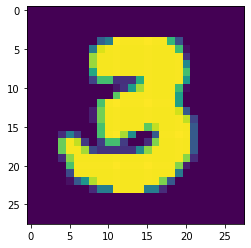

In [21]:
# Code it!
plt.imshow(test_features[loc])